# UTSA CS 3793/5233: Assignment-1

**Last Name - First Name - (abc123)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [1]:
# Add only your imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from queue import Queue


In [2]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


Mounted at /content/drive


In [3]:
# Load the graph data from the files

distance_file = basePath + "distances.csv"
cities_file = basePath + "cities.csv"
texas_file = basePath + "texas_map.png"

class City:
  def __init__(self, name, longitude, latitude):
    self.name = name
    self.latitude = latitude
    self.longitude = longitude

  def haversine_distance(self, query_latitude, query_longitude):
    
    earth_radius_miles = 3958.8

    dLat = radians(query_latitude - self.latitude)
    dLon = radians(query_longitude - self.longitude)
    lat1 = radians(self.latitude)
    lat2 = radians(query_latitude)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return earth_radius_miles * c

class Distance:
  def __init__(self, city_one, city_two, distance):
    self.city_one = city_one
    self.city_two = city_two
    self.distance = distance

cities = {}
cities_list = []
distances = []

with open(cities_file, "r") as city_f:
  for city in city_f:
    city = city.rstrip()
    city_split = city.split(",")
    cities[city_split[0]] = (float(city_split[2]), float(city_split[1]))
    cities_list.append(city_split[0])

df = pd.read_csv(distance_file, names=('city_one', 'city_two', 'distance'))
df = df.reset_index()
for index, row in df.iterrows():
  d = Distance(row['city_one'], row['city_two'], float(row['distance']))
  distances.append(d)

adj_matrix = [[0 for i in range(len(cities))] for j in range(len(cities))]
for d in distances:
  adj_matrix[cities_list.index(d.city_one)][cities_list.index(d.city_two)] = d.distance
  adj_matrix[cities_list.index(d.city_two)][cities_list.index(d.city_one)] = d.distance



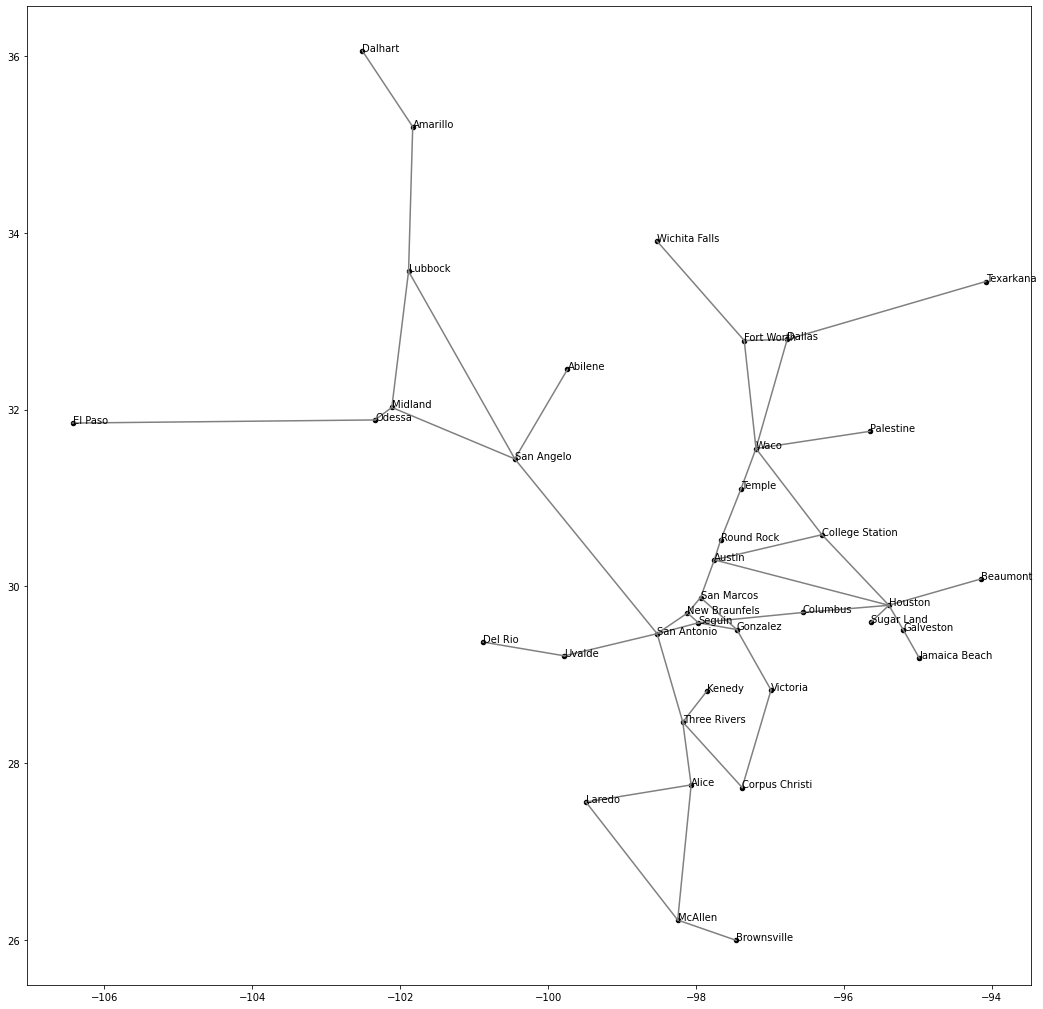

In [4]:
# Display a 2D graph of the given data.

plt.figure(figsize=(18,18))
for k, v in cities.items():
  plt.scatter(v[0], v[1], s=20, c='black')
  plt.text(v[0], v[1], k)

for d in distances:
  c1_coord = cities.get(d.city_one)
  c2_coord = cities.get(d.city_two)
  x_vals = [c1_coord[0], c2_coord[0]]
  y_vals = [c1_coord[1], c2_coord[1]]
  plt.plot(x_vals, y_vals, c="grey")
plt.show()


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

1 Corpus Christi
2 Kenedy
3 San Antonio
4 Alice
5 Victoria
6 New Braunfels
7 Seguin
8 Uvalde
9 San Angelo
10 McAllen
11 Laredo
12 Gonzalez
13 San Marcos
14 Columbus
15 Del Rio
16 Abilene
17 Lubbock
18 Midland
19 Brownsville
20 Austin
21 Houston
22 Amarillo
23 Odessa
24 Round Rock
25 College Station
26 Sugar Land
27 Galveston
28 Beaumont
29 Dalhart
30 El Paso
31 Temple
32 Waco
33 Jamaica Beach
34 Dallas
35 Palestine
36 Fort Worth
37 Texarkana
38 Wichita Falls
Total Distance:  3381.2687398800003


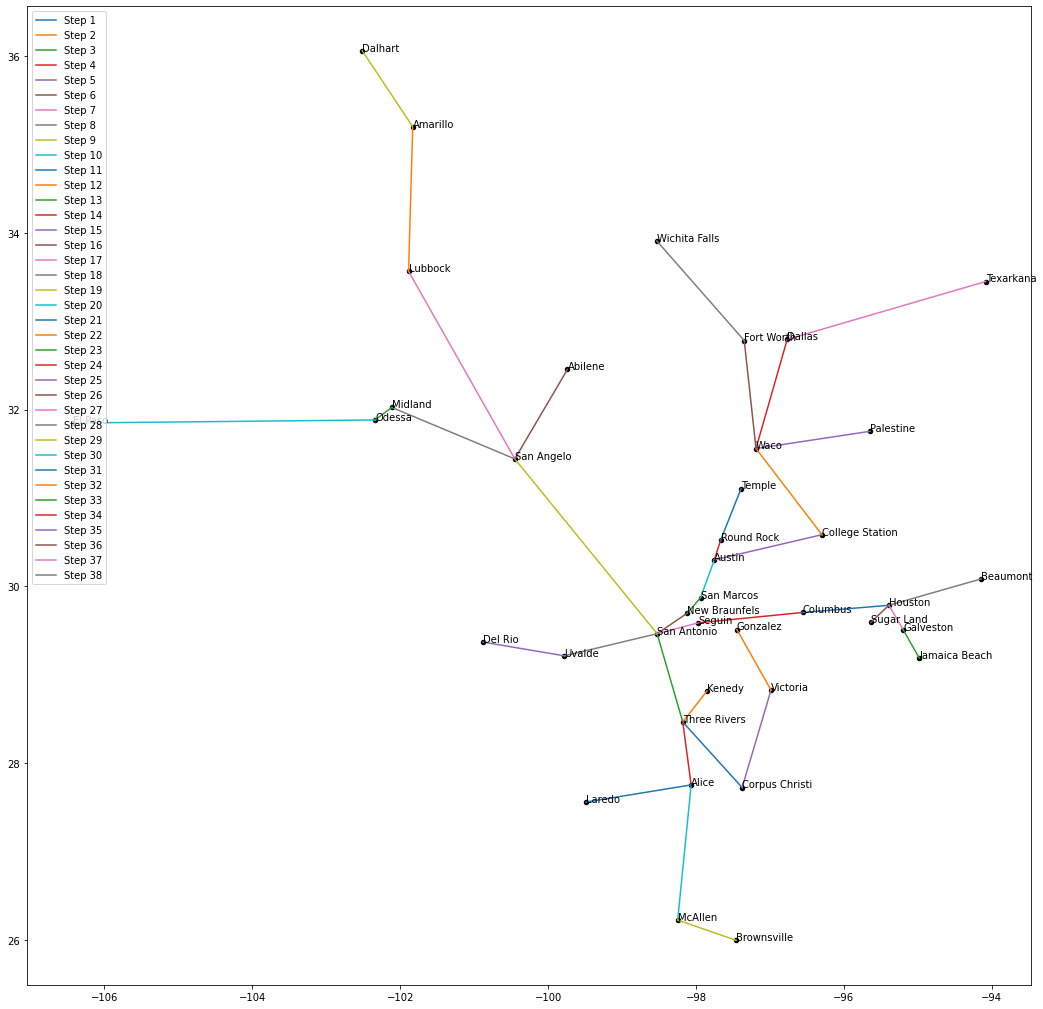

In [5]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'

def breadth_first_search(origin):

  total_distance = 0
  step = 1
  q = Queue(maxsize=len(cities_list))
  frontiers = set()
  expanded = set()
  q.put(origin)
  expanded.add(origin)

  plt.figure(figsize=(18,18))
  for k, v in cities.items():
    plt.scatter(v[0], v[1], s=20, c='black')
    plt.text(v[0], v[1], k)

  while not q.empty():

    frontiers.clear()
    current = q.get()
    for i, v in enumerate(cities_list):
      if adj_matrix[cities_list.index(current)][i] > 0:
        frontiers.add(cities_list[i])
    
    for f in frontiers:
      if f not in expanded:
        expanded.add(f)
        q.put(f)
        total_distance += adj_matrix[cities_list.index(current)][cities_list.index(f)]
        c1_coord = cities.get(current)
        c2_coord = cities.get(f)
        x_vals = [c1_coord[0], c2_coord[0]]
        y_vals = [c1_coord[1], c2_coord[1]]
        step_label = "Step " + str(step)
        print(step, f)
        plt.plot(x_vals, y_vals, label=step_label)
        step += 1

  print("Total Distance: ", total_distance)
  plt.legend()
  plt.show()
    
breadth_first_search("Three Rivers")

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

Optimal path taken:
San Antonio
New Braunfels
San Marcos
Austin
College Station

 Total Optimal distance 186.77450141 miles


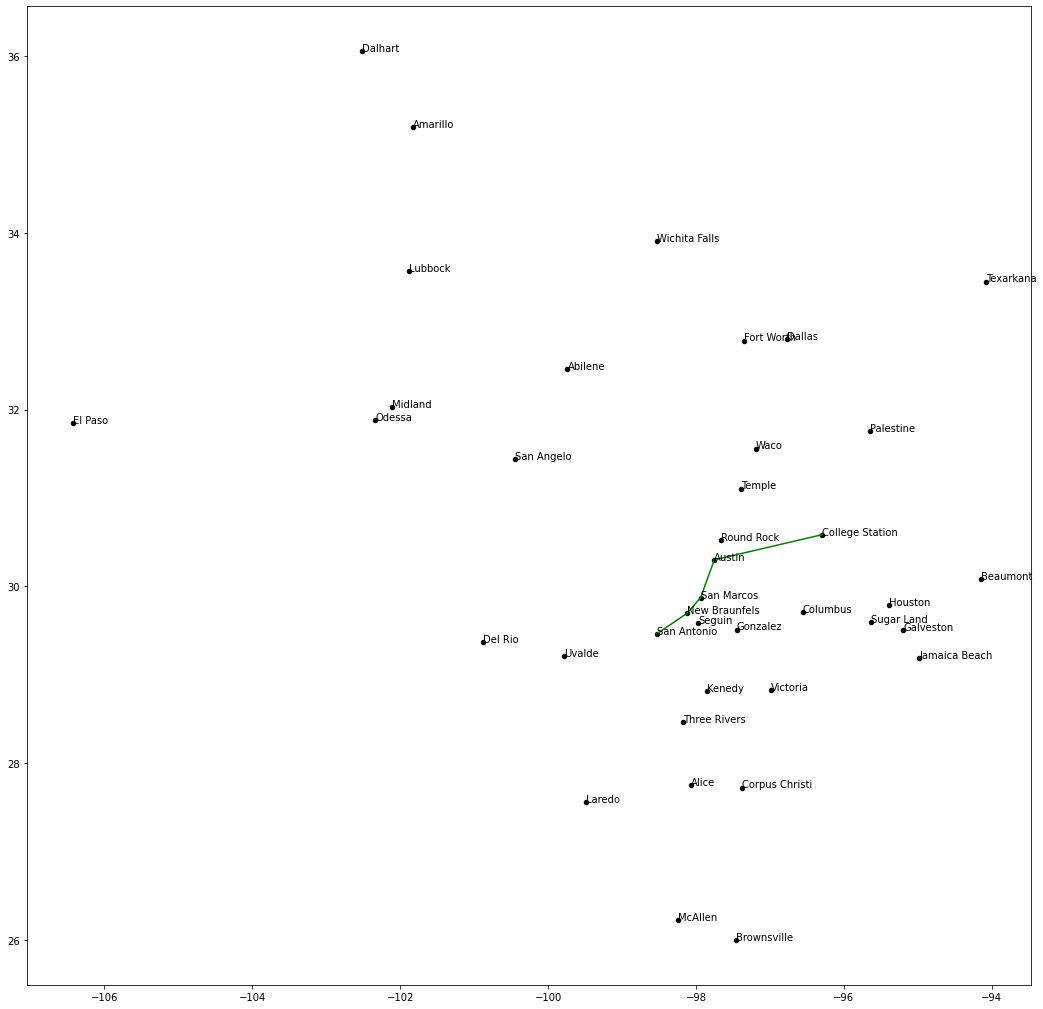

In [6]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'


class State:

  def __init__(self, name, weight, parents):
    self.name = name
    self.weight = weight
    self.parents = parents

def a_star_search(origin, goal):

  origin_coord = cities.get(origin)
  origin_city = City(origin, origin_coord[0], origin_coord[1])
  goal_coord = cities.get(goal)
  goal_city = City(goal, goal_coord[0], goal_coord[1])

  frontiers = set()
  pq = []
  expanded = {}

  pq.append(State(origin, 0, []))
  count = 1

  solution = None
  while True:

    #get priority
    min_weight = 1000000

    if pq: 
      for p in pq:
        if p.weight < min_weight:
          min_weight = p.weight
          min_idx = pq.index(p)
    else:
      break
    
    current = pq.pop(min_idx)
    if solution:
      if current.weight > solution.weight:
        continue
    if current.name == goal:
      if solution:
        if solution.weight > current.weight:
          solution = current
      else:
        solution = current
    expanded[current.name] = current

    frontiers.clear()
    #get frontiers
    for i, v in enumerate(cities_list):
      if adj_matrix[cities_list.index(current.name)][i] > 0:
        frontiers.add(cities_list[i])

    for f in frontiers:
      f_coord = cities.get(f)
      haversine = goal_city.haversine_distance(f_coord[1], f_coord[0])
      path_cost = adj_matrix[cities_list.index(current.name)][cities_list.index(f)] + expanded.get(current.name).weight
      weight = haversine + path_cost
      parent_list = [p for p in current.parents]
      parent_list.append(current.name)
      pq.append(State(f, weight, parent_list))

  return solution

solution = a_star_search("San Antonio", "College Station")

plt.figure(figsize=(18,18))
for k, v in cities.items():
  plt.scatter(v[0], v[1], s=20, c='black')
  plt.text(v[0], v[1], k)

print("Optimal path taken:")
for p in solution.parents:
  print(p)
print(solution.name)
total = 0
for i in range(len(solution.parents)):
  c1_coord = cities.get(solution.parents[i])
  if i == len(solution.parents) - 1:
    c2_coord = cities.get(solution.name)
    total += adj_matrix[cities_list.index(solution.parents[i])][cities_list.index(solution.name)]
  else:
    total += adj_matrix[cities_list.index(solution.parents[i])][cities_list.index(solution.parents[i+1])]
    c2_coord = cities.get(solution.parents[i + 1])
  x_vals = [c1_coord[0], c2_coord[0]]
  y_vals = [c1_coord[1], c2_coord[1]]
  plt.plot(x_vals, y_vals, c="green")
print("\n", "Total Optimal distance", total, "miles")
plt.show()



#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



